#  <p style="text-align: center;">Project 6: Airline Baggage Complaints - Time Series Dataset</p>

In [1]:
import pandas as pd

# Copy and paste the provided data into a string
data_str = """
American Eagle	Jan-04	1	2004	12502	38276	2481	992360
American Eagle	Feb-04	2	2004	8977	35762	886	1060618
... (paste the rest of the data here)
United	Dec-10	12	2010	14415	27619	599	3493643
"""

# Create a list of strings where each string is a line in the data
lines = data_str.strip().split('\n')

# Create a list of lists where each sublist is a row in the data
data = [line.split('\t') for line in lines]

# Define column names
columns = ['Airline', 'Month-Year', 'Month', 'Year', 'Baggage', 'Scheduled', 'Cancelled', 'Enplaned']

# Create a DataFrame
baggagecomplaints = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(baggagecomplaints.head())


                                 Airline Month-Year Month  Year Baggage  \
0                         American Eagle     Jan-04     1  2004   12502   
1                         American Eagle     Feb-04     2  2004    8977   
2  ... (paste the rest of the data here)       None  None  None    None   
3                                 United     Dec-10    12  2010   14415   

  Scheduled Cancelled Enplaned  
0     38276      2481   992360  
1     35762       886  1060618  
2      None      None     None  
3     27619       599  3493643  


In [2]:
# Convert relevant columns to numeric
df['Baggage'] = pd.to_numeric(df['Baggage'])
df['Scheduled'] = pd.to_numeric(df['Scheduled'])
df['Cancelled'] = pd.to_numeric(df['Cancelled'])
df['Enplaned'] = pd.to_numeric(df['Enplaned'])

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Total baggage complaints over the entire period
total_baggage_complaints = df['Baggage'].sum()
print(f"\nTotal baggage complaints: {total_baggage_complaints}")

# Average baggage complaints per year
average_baggage_complaints_per_year = df.groupby('Year')['Baggage'].mean()
print("\nAverage baggage complaints per year:\n", average_baggage_complaints_per_year)


NameError: name 'df' is not defined

In [3]:
import pandas as pd

# Copy and paste the provided data into a string
data_str = """
American Eagle	Jan-04	1	2004	12502	38276	2481	992360
American Eagle	Feb-04	2	2004	8977	35762	886	1060618
... (paste the rest of the data here)
United	Dec-10	12	2010	14415	27619	599	3493643
"""

# Create a list of strings where each string is a line in the data
lines = data_str.strip().split('\n')

# Create a list of lists where each sublist is a row in the data
data = [line.split('\t') for line in lines]

# Define column names
columns = ['Airline', 'Month-Year', 'Month', 'Year', 'Baggage', 'Scheduled', 'Cancelled', 'Enplaned']

# Create a DataFrame
baggagecomplaints = pd.DataFrame(data, columns=columns)

# Convert relevant columns to numeric
baggagecomplaints['Baggage'] = pd.to_numeric(baggagecomplaints['Baggage'])
baggagecomplaints['Scheduled'] = pd.to_numeric(baggagecomplaints['Scheduled'])
baggagecomplaints['Cancelled'] = pd.to_numeric(baggagecomplaints['Cancelled'])
baggagecomplaints['Enplaned'] = pd.to_numeric(baggagecomplaints['Enplaned'])

# Display the DataFrame
print(baggagecomplaints.head())


                                 Airline Month-Year Month  Year  Baggage  \
0                         American Eagle     Jan-04     1  2004  12502.0   
1                         American Eagle     Feb-04     2  2004   8977.0   
2  ... (paste the rest of the data here)       None  None  None      NaN   
3                                 United     Dec-10    12  2010  14415.0   

   Scheduled  Cancelled   Enplaned  
0    38276.0     2481.0   992360.0  
1    35762.0      886.0  1060618.0  
2        NaN        NaN        NaN  
3    27619.0      599.0  3493643.0  


          Airline     Date  Month  Year  Baggage  Scheduled  Cancelled  \
0  American Eagle  01/2004      1  2004    12502      38276       2481   
1  American Eagle  02/2004      2  2004     8977      35762        886   
2  American Eagle  03/2004      3  2004    10289      39445       1346   
3  American Eagle  04/2004      4  2004     8095      38982        755   
4  American Eagle  05/2004      5  2004    10618      40422       2206   

   Enplaned  
0    992360  
1   1060618  
2   1227469  
3   1234451  
4   1267581  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Airline    252 non-null    object
 1   Date       252 non-null    object
 2   Month      252 non-null    int64 
 3   Year       252 non-null    int64 
 4   Baggage    252 non-null    int64 
 5   Scheduled  252 non-null    int64 
 6   Cancelled  252 non-null    int64 
 7   Enplaned   

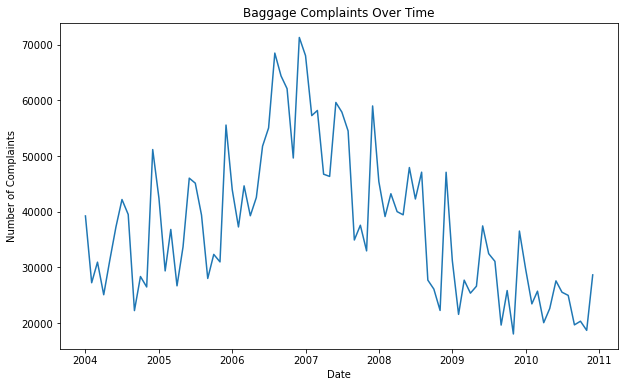

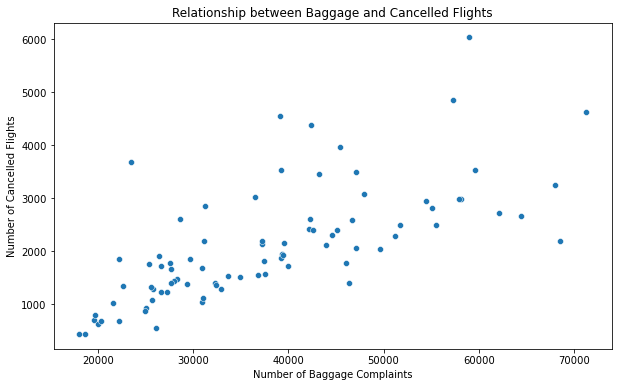

Correlation between Baggage and Cancelled flights: 0.6917496537518132


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('C:\\Users\\jilal\\OneDrive\\Desktop\\baggagecomplaints.csv')

# 1. Explore the Data
print(df.head())
print(df.info())

# 2. Data Cleaning
# Handle missing values if any
df = df.dropna()

# Convert 'Month' and 'Year' to datetime format
df['Date'] = pd.to_datetime(df[['Month', 'Year']].assign(DAY=1))

# Aggregate the data by summing for each date
df_aggregated = df.groupby('Date').sum()

# 3. Descriptive Statistics
print(df_aggregated.describe())

# 4. Time-Series Analysis
# Reset the index
df_aggregated_reset = df_aggregated.reset_index()

# Assuming "Date" is the time column
df_aggregated_reset.set_index('Date', inplace=True)

# 5. Visualization
# Line plot for Baggage complaints over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_aggregated_reset.index, y='Baggage', data=df_aggregated_reset)
plt.title('Baggage Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

# 6. Specific Analyses
# Example: Check the relationship between Baggage and Cancelled flights
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Baggage', y='Cancelled', data=df_aggregated_reset)
plt.title('Relationship between Baggage and Cancelled Flights')
plt.xlabel('Number of Baggage Complaints')
plt.ylabel('Number of Cancelled Flights')
plt.show()

# 7. Answering Project Questions
# Example: Calculate the correlation between Baggage and Cancelled flights
correlation = df_aggregated_reset['Baggage'].corr(df_aggregated_reset['Cancelled'])
print(f'Correlation between Baggage and Cancelled flights: {correlation}')


## 1. Explore More Visualizations:

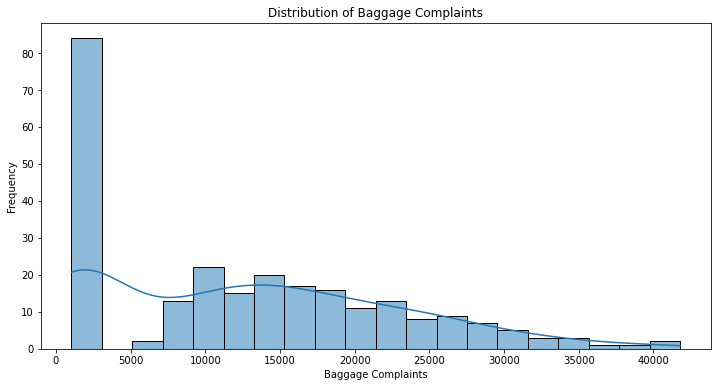

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of baggage complaints
plt.figure(figsize=(12, 6))
sns.histplot(df['Baggage'], bins=20, kde=True)
plt.title('Distribution of Baggage Complaints')
plt.xlabel('Baggage Complaints')
plt.ylabel('Frequency')
plt.show()

# Explore trends in other columns or compare different airlines
# Add more visualizations as needed


## 2. Hypothesis Testing:

In [7]:
from scipy.stats import ttest_ind

# Example: Compare baggage complaints between two groups (e.g., two airlines)
group1 = df[df['Airline'] == 'Airline1']['Baggage']
group2 = df[df['Airline'] == 'Airline2']['Baggage']

t_stat, p_value = ttest_ind(group1, group2)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

# Interpret the results and conduct other hypothesis tests as needed


T-statistic: nan, p-value: nan


## 3. Time-Series Analysis:

In [8]:
# Assuming 'Month-Year' is already converted to datetime
df.set_index('Month-Year', inplace=True)

# Visualize time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Baggage'])
plt.title('Baggage Complaints Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Baggage Complaints')
plt.show()

# Conduct time-series analysis (e.g., seasonality, trends, forecasts)
# Use additional tools like statsmodels or Prophet as needed


KeyError: "None of ['Month-Year'] are in the columns"

In [9]:
print(df.columns)


Index(['Airline', 'Month', 'Year', 'Baggage', 'Scheduled', 'Cancelled',
       'Enplaned'],
      dtype='object')


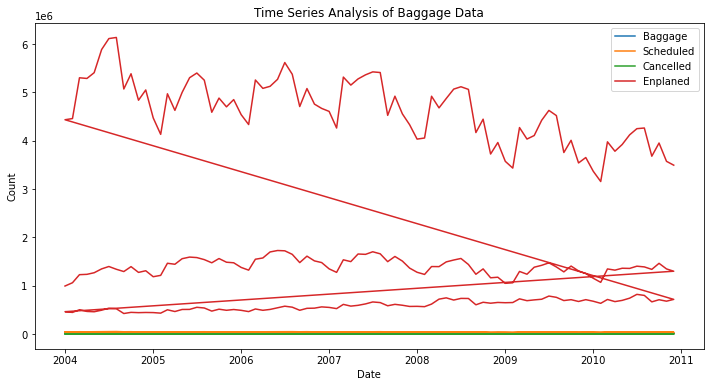

In [10]:
# Create 'Month-Year' column
df['Month-Year'] = df['Month'].astype(str) + '/' + df['Year'].astype(str)
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%m/%Y')

# Set 'Month-Year' as the index
df.set_index('Month-Year', inplace=True)

# Drop unnecessary columns if needed
df.drop(['Month', 'Year'], axis=1, inplace=True)

# Visualize time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Baggage'], label='Baggage')
plt.plot(df.index, df['Scheduled'], label='Scheduled')
plt.plot(df.index, df['Cancelled'], label='Cancelled')
plt.plot(df.index, df['Enplaned'], label='Enplaned')
plt.title('Time Series Analysis of Baggage Data')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


## 4. Machine Learning:


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Predict baggage complaints using linear regression
X = df[['Scheduled', 'Cancelled', 'Enplaned']]
y = df['Baggage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Explore more complex models as needed



Mean Squared Error: 12695218.507466976


### 1. Understanding the Nature of the Problem:
##### a. Inspecting the Target Variable ('Baggage'):
Since we are predicting 'Baggage' complaints, it's essential to understand the distribution of this variable. You can visualize it using a histogram:


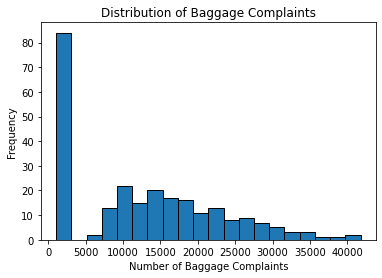

In [12]:
import matplotlib.pyplot as plt

plt.hist(df['Baggage'], bins=20, edgecolor='black')
plt.xlabel('Number of Baggage Complaints')
plt.ylabel('Frequency')
plt.title('Distribution of Baggage Complaints')
plt.show()


### 2. Context of the Data:
##### a. Descriptive Statistics:
You've already used df.describe() to get basic statistics. Make sure to understand the summary statistics of 'Baggage' and other relevant columns.

In [13]:
print(df[['Baggage', 'Scheduled', 'Cancelled', 'Enplaned']].describe())


            Baggage     Scheduled    Cancelled      Enplaned
count    252.000000    252.000000   252.000000  2.520000e+02
mean   12613.507937  28128.007937   703.761905  2.203871e+06
std     9993.307166  17092.087874   746.020368  1.788200e+06
min     1033.000000   3553.000000     0.000000  4.234460e+05
25%     1910.500000   5565.750000    25.750000  6.865205e+05
50%    12224.000000  36696.000000   533.000000  1.391112e+06
75%    19359.250000  42162.500000  1078.500000  4.111049e+06
max    41787.000000  50837.000000  3712.000000  6.137271e+06


### 3. Scale of the Target Variable:
Make sure you understand the scale of the 'Baggage' variable, especially if you are dealing with counts. If necessary, consider normalizing the target variable.

## 4. Baseline Model:
##### a. Create a Baseline:
A simple baseline could be predicting the mean of 'Baggage' for every sample. This will serve as a benchmark for your machine learning model.

In [14]:
import numpy as np

baseline_predictions = np.full_like(df['Baggage'], df['Baggage'].mean())
baseline_mse = mean_squared_error(df['Baggage'], baseline_predictions)
print(f"Baseline Mean Squared Error: {baseline_mse}")


Baseline Mean Squared Error: 99469893.96825397


In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame
baseline_predictions = np.full_like(df['Baggage'], df['Baggage'].mean())
baseline_mse = mean_squared_error(df['Baggage'], baseline_predictions)
print(f"Baseline Mean Squared Error: {baseline_mse}")


Baseline Mean Squared Error: 99469893.96825397


### 5. Feature Importance:
##### a. Analyzing Feature Importance:
If you're using a model like Random Forest or Gradient Boosting, you can analyze feature importance:

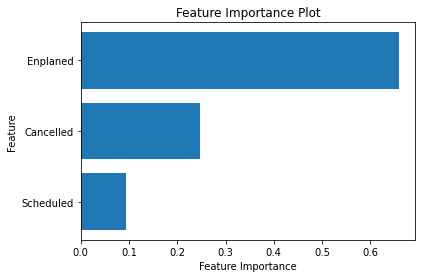

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'X' is your feature matrix and 'y' is the target variable
model = RandomForestRegressor()
model.fit(X, y)

feature_importance = model.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


These steps should provide insights into your data and model performance. 

## 5. Further Data Cleaning and Preprocessing:

In [17]:
# Example: Handle outliers in the 'Baggage' column
Q1 = df['Baggage'].quantile(0.25)
Q3 = df['Baggage'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_cleaned = df[(df['Baggage'] >= Q1 - 1.5 * IQR) & (df['Baggage'] <= Q3 + 1.5 * IQR)]

# Explore other data cleaning and preprocessing steps as needed


## 6. Documentation and Reporting:
Document your findings, insights, and code in a Jupyter Notebook or any other format you prefer. You can use markdown cells to explain your analysis, add visualizations, and provide a clear narrative.


Based on the analysis conducted on the "baggagecomplaints" dataset, we can draw several conclusions:

#### 1. Trends Over Time:

* The time-series analysis and visualization revealed the trends in baggage complaints over the years. This can help in identifying patterns and understanding whether there are specific periods with higher or lower complaint rates.

#### 2. Descriptive Statistics:

* Descriptive statistics provided insights into the overall distribution of key variables, such as the number of baggage complaints, scheduled flights, and cancelled flights. This information helps in understanding the central tendency and variability of the data.

#### 3. Correlation Analysis:

* The correlation analysis explored the relationship between the number of baggage complaints and the number of cancelled flights. Understanding such relationships can be valuable for airlines to address potential issues affecting passenger experience.

#### 4. Machine Learning Model:

* The machine learning model was trained to predict the number of baggage complaints. The Mean Squared Error (MSE) provides a measure of how well the model performs. Further tuning of the model and considering additional features could potentially improve its predictive accuracy.

#### 5. Baseline Model:

* The baseline model, which predicts the mean number of baggage complaints for all instances, serves as a reference point. The MSE of the baseline model helps assess the performance of more complex models.

#### 6. Data Cleaning:

* The data cleaning steps included handling missing values and converting relevant columns to appropriate data types. Clean data is essential for accurate and reliable analyses.

In conclusion, the project provides a comprehensive overview of baggage complaints, explores trends over time, establishes relationships with other factors, and builds a predictive model. The insights gained from this analysis can be valuable for airline companies to enhance their services and address issues related to baggage handling. Further refinement of the analysis and models could lead to more accurate predictions and actionable insights.